In [1]:
import os
import json
import pandas as pd
import numpy as np
from scipy.fft import fft
import matplotlib.pyplot as plt
import csv

In [2]:
# Pembacaan Parameter Dataset
filename = "parameter.json"
with open(filename, 'r') as f:
    params = json.load(f)

In [3]:
from sklearn.preprocessing import PowerTransformer
from scipy import signal

rr_target = []
hr_target = []
rr_phase = []
hr_phase = []
rr_target_public = []
hr_target_public = []
rr_phase_public = []
hr_phase_public = []
ext_rr_phase = []
ext_hr_phase = []

with open('./data_ta/cleaned_br_wave.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
        try:
            data = np.array([float(val) for val in lines if val.strip() != ''])
        except ValueError:
            continue  # skip this line if conversion to float fails

        if data.size == 0:
            continue  # skip if the line is empty
        pt = PowerTransformer()
    
        br_norm_ = pt.fit_transform(data.reshape(-1, 1))
        
        br_downsampled = signal.resample(br_norm_, 6000)
        
        rr_target_public.append(br_downsampled)
        
with open('./data_ta/cleaned_hr_wave.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
        try:
            data = np.array([float(val) for val in lines if val.strip() != ''])
        except ValueError:
            continue  # skip this line if conversion to float fails

        if data.size == 0:
            continue  # skip if the line is empty
        pt = PowerTransformer()
    
        hr_norm_ = pt.fit_transform(data.reshape(-1, 1))
        
        hr_downsampled = signal.resample(hr_norm_, 39000)
        hr_target_public.append(hr_downsampled)
with open('./data_ta/cleaned_br_phase.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
        try:
            data = np.array([float(val) for val in lines if val.strip() != ''])
        except ValueError:
            continue  # skip this line if conversion to float fails

        if data.size == 0:
            continue  # skip if the line is empty
        pt = PowerTransformer()
    
        br_norm_ = pt.fit_transform(data.reshape(-1, 1))
        
        br_downsampled = signal.resample(br_norm_, 6000)
        rr_phase_public.append(br_downsampled)
        
with open('./data_ta/cleaned_hr_phase.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
        try:
            data = np.array([float(val) for val in lines if val.strip() != ''])
        except ValueError:
            continue  # skip this line if conversion to float fails

        if data.size == 0:
            continue  # skip if the line is empty
        pt = PowerTransformer()
    
        hr_norm_ = pt.fit_transform(data.reshape(-1, 1))
        
        hr_downsampled = signal.resample(hr_norm_, 39000)
    
        hr_phase_public.append(hr_downsampled)

with open('./preprocessed_data/rr_wave.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
        rr_target.append(lines)
        
with open('./preprocessed_data/hr_wave.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
        hr_target.append(lines)
with open('./preprocessed_data/rr_phase.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
        rr_phase.append(lines)
        
with open('./preprocessed_data/hr_phase.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
        hr_phase.append(lines)
with open('./preprocessed_data/ext_rr_phase.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
        ext_rr_phase.append(lines)
        
with open('./preprocessed_data/ext_hr_phase.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
        ext_hr_phase.append(lines)

In [4]:
len(rr_target)

80

In [5]:
rr_target_array = []
hr_target_array = []
rr_phase_array = []
hr_phase_array = []
ext_rr_phase_array = []
ext_hr_phase_array = []
for i in range(0, 80, 2):
    rr_target_array.append(rr_target[i])
    hr_target_array.append(hr_target[i])
    rr_phase_array.append(rr_phase[i])
    hr_phase_array.append(hr_phase[i])
    ext_rr_phase_array.append(ext_rr_phase[i])
    ext_hr_phase_array.append(ext_hr_phase[i])

rr_target_array = np.array(rr_target_array).astype(np.float64)
hr_target_array = np.array(hr_target_array).astype(np.float64)
rr_phase_array = np.array(rr_phase_array).astype(np.float64)
hr_phase_array = np.array(hr_phase_array).astype(np.float64)
ext_rr_phase_array = np.array(ext_rr_phase_array).astype(np.float64)
ext_hr_phase_array = np.array(ext_hr_phase_array).astype(np.float64)

In [6]:
rr_target_array_public = []
hr_target_array_public = []
rr_phase_array_public = []
hr_phase_array_public = []
for i in range(0, 152, 2):
    rr_target_array_public.append(rr_target_public[i])
    hr_target_array_public.append(hr_target_public[i])
    rr_phase_array_public.append(rr_phase_public[i])
    hr_phase_array_public.append(hr_phase_public[i])
    
rr_target_array_public = np.array(rr_target_array_public).astype(np.float64)
hr_target_array_public = np.array(hr_target_array_public).astype(np.float64)
rr_phase_array_public = np.array(rr_phase_array_public).astype(np.float64)
hr_phase_array_public = np.array(hr_phase_array_public).astype(np.float64)

In [7]:
print(rr_phase_array.shape)
print(hr_phase_array.shape)
print(rr_target_array.shape)
print(hr_target_array.shape)
print(rr_target_array_public.shape)
print(hr_target_array_public.shape)
print(rr_phase_array_public.shape)
print(hr_phase_array_public.shape)

(40, 3000)
(40, 19500)
(40, 3000)
(40, 19500)
(76, 6000, 1)
(76, 39000, 1)
(76, 6000, 1)
(76, 39000, 1)


In [8]:
import numpy as np

array2_squeezed = np.squeeze(rr_phase_array_public)
first_halves = array2_squeezed[:, :3000]
second_halves = array2_squeezed[:, 3000:]
rr_phase_array = np.vstack([first_halves, second_halves, rr_phase_array])

array2_squeezed = np.squeeze(rr_target_array_public)
first_halves = array2_squeezed[:, :3000]
second_halves = array2_squeezed[:, 3000:]
rr_target_array = np.vstack([first_halves, second_halves, rr_target_array])

array2_squeezed = np.squeeze(hr_phase_array_public)
first_halves = array2_squeezed[:, :19500]
second_halves = array2_squeezed[:, 19500:]
hr_phase_array = np.vstack([first_halves, second_halves, hr_phase_array])

array2_squeezed = np.squeeze(hr_target_array_public)
first_halves = array2_squeezed[:, :19500]
second_halves = array2_squeezed[:, 19500:]
hr_target_array = np.vstack([first_halves, second_halves, hr_target_array])
print(rr_phase_array.shape)
print(hr_phase_array.shape)
print(rr_target_array.shape)
print(hr_target_array.shape)

(192, 3000)
(192, 19500)
(192, 3000)
(192, 19500)


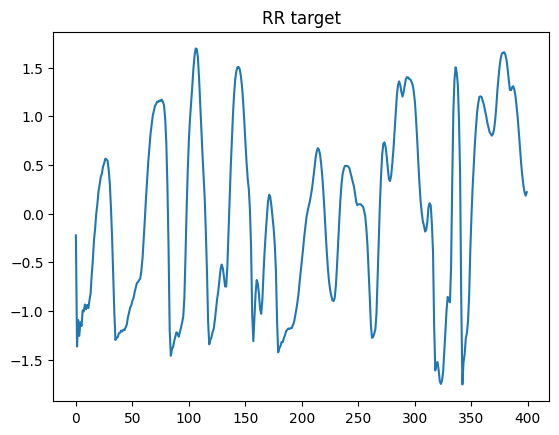

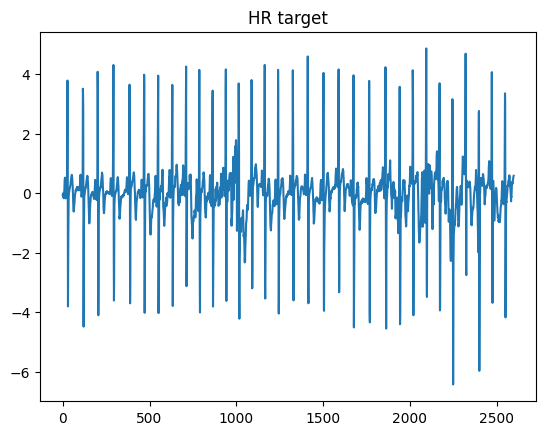

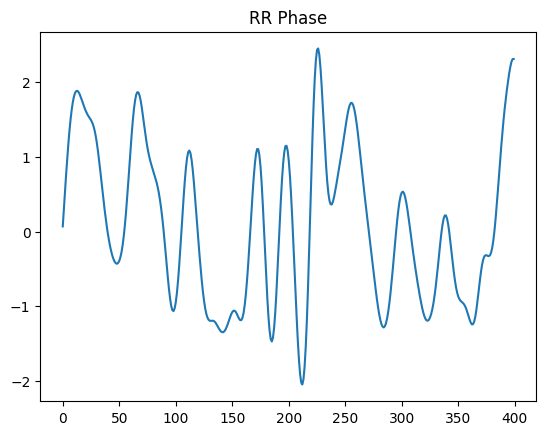

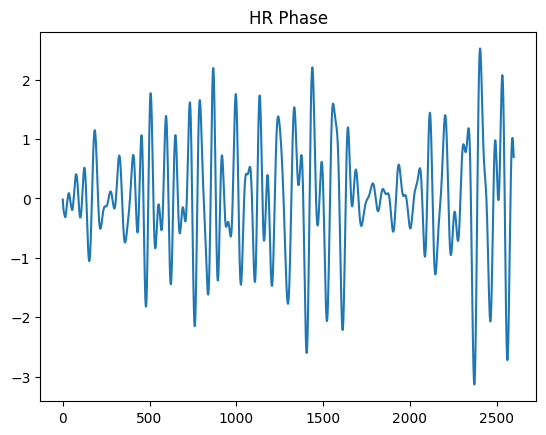

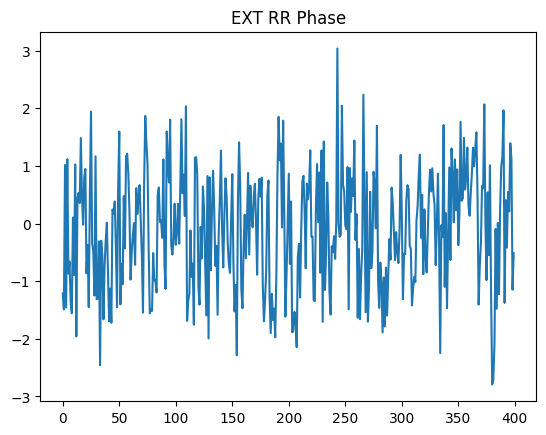

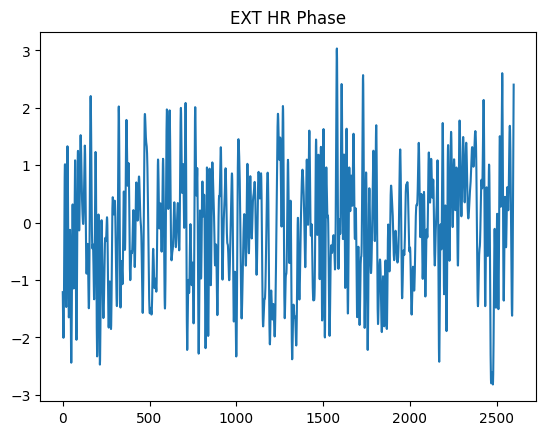

In [9]:
plt.figure(1)
plt.title("RR target")
plt.plot(rr_target_array[0][:400],label="RR target")
plt.figure(2)
plt.title("HR target")
plt.plot(hr_target_array[0][:2600],label="HR target")
plt.figure(3)
plt.title("RR Phase")
plt.plot(rr_phase_array[0][:400],label="RR Phase")
plt.figure(4)
plt.title("HR Phase")
plt.plot(hr_phase_array[0][:2600],label="HR Phase")
plt.figure(5)
plt.title("EXT RR Phase")
plt.plot(ext_rr_phase_array[0][:400],label="EXT RR Phase")
plt.figure(6)
plt.title("EXT HR Phase")
plt.plot(ext_hr_phase_array[0][:2600],label="EXT HR Phase")

In [10]:
def slide_win_rr(data):
    isi_dataVT =[]
    for k in range(len(data)):
        i = 0
        while(True):
            if i == 0:
                index_1 = i
            else :
                index_1 = index_2 - 380
            index_2 = index_1 + 400
            if index_2 > data.shape[1]:
                break
            vt_20s_1 = data[k][index_1:index_2]
            isi_dataVT.append(vt_20s_1)
            i+=1


    return isi_dataVT

def slide_win_hr(data):
    isi_dataVT =[]
    for k in range(len(data)):
        i = 0
        while(True):
            if i == 0:
                index_1 = i
            else :
                index_1 = index_2 - 2470
            index_2 = index_1 + 2600
            if index_2 > data.shape[1]:
                break
            vt_20s_1 = data[k][index_1:index_2]
            isi_dataVT.append(vt_20s_1)
            i+=1


    return isi_dataVT

In [11]:
slide_rr_phase = np.array(slide_win_rr(rr_phase_array))
# slide_hr_phase = np.array(slide_win_hr(hr_phase_array))
slide_rr_target = np.array(slide_win_rr(rr_target_array))
# slide_hr_target = np.array(slide_win_hr(hr_target_array))
slide_ext_rr = np.array(slide_win_rr(ext_rr_phase_array))
slide_ext_hr = np.array(slide_win_hr(ext_hr_phase_array))

In [12]:
# print(slide_rr_phase.shape, slide_rr_target.shape, slide_hr_phase.shape, slide_hr_target.shape, slide_ext_rr.shape, slide_ext_hr.shape)

In [13]:
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, Add
import tensorflow as tf
def causal_conv_block(x, filters, kernel_size, dilation_rate, block_name):
    # Causal dilated Conv1D
    x_conv = layers.Conv1D(
        filters=filters,
        kernel_size=kernel_size,
        padding='causal',
        dilation_rate=dilation_rate,
        activation='relu',
        name=f'{block_name}_conv'
    )(x)

    # Multi-Head Attention
    attn = MultiHeadAttention(num_heads=2, key_dim=filters//2, attention_axes=(1,), name=f'{block_name}_attn')(x_conv, x_conv)
    x = Add(name=f'{block_name}_add')([x_conv, attn])
    x = LayerNormalization(name=f'{block_name}_ln')(x)

    return x
def build_ecg_autoencoder():
    input_shape = (400, 1)
    inputs = layers.Input(shape=input_shape)

    # Encoder (TCN-style with increasing dilation rate)
    x = causal_conv_block(inputs, 16, 7, 1, "enc1")
    x = layers.MaxPooling1D(pool_size=2)(x)

    x = causal_conv_block(x, 32, 7, 2, "enc2")
    x = layers.MaxPooling1D(pool_size=2)(x)

    x = causal_conv_block(x, 64, 7, 4, "enc3")
    x = layers.MaxPooling1D(pool_size=2)(x)

    x = causal_conv_block(x, 128, 7, 8, "bottleneck")

    # Decoder (Transpose convolution - no attention)
    x = layers.Conv1DTranspose(64, 7, strides=2, padding='same', activation='relu')(x)
    x = layers.Conv1D(64, 7, padding='same', activation='relu')(x)

    x = layers.Conv1DTranspose(32, 7, strides=2, padding='same', activation='relu')(x)
    x = layers.Conv1D(32, 7, padding='same', activation='relu')(x)

    x = layers.Conv1DTranspose(16, 7, strides=2, padding='same', activation='relu')(x)
    x = layers.Conv1D(16, 7, padding='same', activation='relu')(x)

    outputs = layers.Conv1D(1, kernel_size=1, activation='linear')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(1e-3), loss='mse')
    return model

def tcn_encoder_block(x, filters, kernel_size, dilation_rate, attn_heads, activation, key_dim, block_name):
    # Causal Dilated Conv1D
    x_conv = layers.Conv1D(
        filters=filters,
        kernel_size=kernel_size,
        padding='causal',
        dilation_rate=dilation_rate,
        activation=activation,
        name=f'{block_name}_conv'
    )(x)

    # Multi-Head Attention
    attn = MultiHeadAttention(
        num_heads=attn_heads,
        key_dim=key_dim,
        attention_axes=(1,),
        name=f'{block_name}_attn'
    )(x_conv, x_conv)
    
    x = Add(name=f'{block_name}_add')([x_conv, attn])
    x = LayerNormalization(name=f'{block_name}_ln')(x)
    x = layers.MaxPooling1D(pool_size=2, padding='same', name=f'{block_name}_pool')(x)
    return x

def build_partial_finetune_model(hp):
    pretrained = tf.keras.models.load_model(
        'pretrained_rr_autoencoder_public.h5',
        custom_objects={'mse': 'mean_squared_error'}
    )

    new_input = layers.Input(shape=(400, 1), name='radar_input')
    x = new_input

    # TCN Blocks with Hyperparameters
    x = tcn_encoder_block(
        x,
        filters=hp.Int("block1_filters", 16, 64, step=16),
        kernel_size=hp.Choice("kernel_size", [2, 3, 5]),
        dilation_rate=hp.Choice('dilation1', values=[2, 4, 8]),
        activation=hp.Choice('act1', ['relu', 'linear']),
        attn_heads=hp.Choice("attn1_heads", [1, 2]),
        key_dim=hp.Choice("attn1_dim", [8, 16]),
        block_name="block1"
    )

    x = tcn_encoder_block(
        x,
        filters=hp.Int("block2_filters", 32, 128, step=32),
        kernel_size=hp.Choice("kernel_size", [2, 3, 5]),
        dilation_rate=hp.Choice('dilation2', values=[2, 4, 8]),
        attn_heads=hp.Choice("attn2_heads", [1, 2]),
        activation=hp.Choice('act2', ['relu', 'linear']),
        key_dim=hp.Choice("attn2_dim", [16, 32]),
        block_name="block2"
    )

    x = tcn_encoder_block(
        x,
        filters=hp.Int("block3_filters", 64, 128, step=32),
        kernel_size=hp.Choice("kernel_size", [2, 3, 5]),
        dilation_rate=hp.Choice('dilation3', values=[2, 4, 8]),
        attn_heads=hp.Choice("attn3_heads", [1, 2]),
        activation=hp.Choice('act3', ['relu', 'linear']),
        key_dim=hp.Choice("attn3_dim", [32, 64]),
        block_name="block3"
    )

    x = layers.Conv1D(
        128,
        kernel_size=hp.Choice("kernel_size", [2, 3, 5]),
        padding='causal',
        dilation_rate=hp.Choice('dilation4', values=[2, 4, 8]),
        activation=hp.Choice('act4', ['relu', 'linear']),
        name='final_conv'
    )(x)

    # ====== Frozen Decoder ======
    decoder_input = x
    decoder_started = False
    for layer in pretrained.layers:
        if layer.name.startswith('conv1d_transpose'):
            decoder_started = True
        if decoder_started:
            layer.trainable = False
            decoder_input = layer(decoder_input)

    output = decoder_input
    model = Model(inputs=new_input, outputs=output)
    model.compile(optimizer=Adam(learning_rate=hp.Choice("lr", [1e-3, 1e-4])), loss="mse")
    return model


In [14]:
rr_train = slide_rr_phase[:20000]
rr_test = slide_rr_phase[20000:]
rr_target_train = slide_rr_target[:20000]
rr_target_test = slide_rr_target[20000:]

In [15]:
print(rr_train.shape)
print(rr_test.shape)
print(rr_target_train.shape)
print(rr_target_test.shape)

(20000, 400)
(5152, 400)
(20000, 400)
(5152, 400)


In [16]:
# from tensorflow.keras.callbacks import EarlyStopping

# pretrain_model = build_ecg_autoencoder()

# pretrain_model.fit(
#     rr_target_train[:15000], rr_target_train[:15000],
#     validation_data=(rr_target_train[15000:], rr_target_train[15000:]),
#     epochs=50,
#     batch_size=32,
# )

# # Simpan pretrained model
# pretrain_model.save('pretrained_rr_autoencoder_public.h5')

In [17]:
pretrain_model = tf.keras.models.load_model('pretrained_rr_autoencoder_public.h5', custom_objects={'mse': 'mean_squared_error'})

pretrain_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 400, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc1_conv (Conv1D)  │ (None, 400, 16)   │        128 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc1_attn           │ (None, 400, 16)   │      1,088 │ enc1_conv[0][0],  │
│ (MultiHeadAttentio… │                   │            │ enc1_conv[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc1_add (Add)      │ (None, 400, 16)   │          0 │ enc1_conv[0][0],  │
│                     │                   │            │ enc1_attn[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc1_ln             │ (None, 400, 16)   │         32 │ enc1_add[0][0]    │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 200, 16)   │          0 │ enc1_ln[0][0]     │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc2_conv (Conv1D)  │ (None, 200, 32)   │      3,616 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc2_attn           │ (None, 200, 32)   │      4,224 │ enc2_conv[0][0],  │
│ (MultiHeadAttentio… │                   │            │ enc2_conv[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc2_add (Add)      │ (None, 200, 32)   │          0 │ enc2_conv[0][0],  │
│                     │                   │            │ enc2_attn[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc2_ln             │ (None, 200, 32)   │         64 │ enc2_add[0][0]    │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_1     │ (None, 100, 32)   │          0 │ enc2_ln[0][0]     │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc3_conv (Conv1D)  │ (None, 100, 64)   │     14,400 │ max_pooling1d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc3_attn           │ (None, 100, 64)   │     16,640 │ enc3_conv[0][0],  │
│ (MultiHeadAttentio… │                   │            │ enc3_conv[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc3_add (Add)      │ (None, 100, 64)   │          0 │ enc3_conv[0][0],  │
│                     │                   │            │ enc3_attn[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc3_ln             │ (None, 100, 64)   │        128 │ enc3_add[0][0]    │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_2     │ (None, 50, 64)    │          0 │ enc3_ln[0][0]     │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bottleneck_conv     │ (None, 50, 128)   │     57,472 │ max_pooling1d_2[… │
│ (Conv1D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bottleneck_attn     │ (None, 50, 128)   │     66,048 │ bottleneck_conv[

 Total params: 277,235 (1.06 MB)

 Trainable params: 277,233 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

161/161 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step


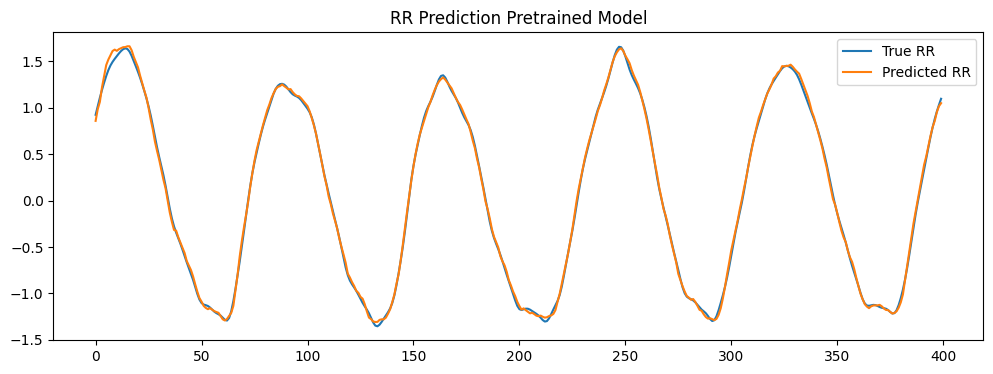

In [18]:
import matplotlib.pyplot as plt

predicted = pretrain_model.predict(rr_target_test)

plt.figure(figsize=(12, 4))
plt.plot(rr_target_test[0], label='True RR')
plt.plot(predicted[0], label='Predicted RR')
plt.legend()
plt.title("RR Prediction Pretrained Model")
plt.show()

In [ ]:
from keras_tuner import RandomSearch
from tensorflow.keras.callbacks import EarlyStopping

tuner = RandomSearch(
    build_partial_finetune_model,
    objective='val_loss',
    max_trials=30,
    executions_per_trial=1,
    directory='tuner_partial_finetune',
    project_name='rr_attn_encoder_tcn_public2'
)

tuner.search(
    rr_train[:15000], rr_target_train[:15000],
    validation_data=(rr_train[15000:], rr_target_train[15000:]),
    epochs=20,
    batch_size=32,
)

# Ambil model terbaik
best_model = tuner.get_best_models(num_models=1)[0]
best_model.save('rr_best_partial_finetuned_decoder_model.h5')

Trial 19 Complete [00h 10m 48s]
val_loss: 0.26202234625816345

Best val_loss So Far: 0.2598426342010498
Total elapsed time: 06h 42m 55s

Search: Running Trial #20

Value             |Best Value So Far |Hyperparameter
16                |32                |block1_filters
5                 |2                 |kernel_size
2                 |4                 |dilation1
linear            |relu              |act1
1                 |2                 |attn1_heads
16                |8                 |attn1_dim
128               |128               |block2_filters
8                 |2                 |dilation2
2                 |1                 |attn2_heads
relu              |linear            |act2
32                |32                |attn2_dim
96                |64                |block3_filters
2                 |2                 |dilation3
2                 |1                 |attn3_heads
linear            |linear            |act3
64                |64                |attn3_dim
8      

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 73ms/step - loss: 0.4583 - val_loss: 0.2624
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 72ms/step - loss: 0.4567 - val_loss: 0.2618
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 71ms/step - loss: 0.4330 - val_loss: 0.2617
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 74ms/step - loss: 0.4589 - val_loss: 0.2615
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 73ms/step - loss: 0.4481 - val_loss: 0.2619
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 71ms/step - loss: 0.4670 - val_loss: 0.2618
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 67ms/step - loss: 0.4389 - val_loss: 0.2620
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - loss: 0.4512 - val_loss: 0.2619
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - loss: 0.4538 - val_loss: 0.2617
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 72ms/step - loss: 0.4516 - val_loss: 0.2618
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 71ms/step - loss: 0.4517 - val_loss: 0.2618
Epoch 12/20
469/469 ━━━━━━━━━━

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=5)[0]
best_model_ = tuner.hypermodel.build(best_hps)
# === Train Best Model ===
history = best_model_.fit(
    rr_train, rr_target_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1,
)

Epoch 1/200
500/500 ━━━━━━━━━━━━━━━━━━━━ 52s 95ms/step - loss: 0.4407 - val_loss: 0.3280
Epoch 2/200
500/500 ━━━━━━━━━━━━━━━━━━━━ 47s 94ms/step - loss: 0.4115 - val_loss: 0.3295
Epoch 3/200
500/500 ━━━━━━━━━━━━━━━━━━━━ 47s 95ms/step - loss: 0.4169 - val_loss: 0.3366
Epoch 4/200
500/500 ━━━━━━━━━━━━━━━━━━━━ 47s 95ms/step - loss: 0.4030 - val_loss: 0.3419
Epoch 5/200
500/500 ━━━━━━━━━━━━━━━━━━━━ 48s 95ms/step - loss: 0.3703 - val_loss: 0.3844
Epoch 6/200
500/500 ━━━━━━━━━━━━━━━━━━━━ 47s 95ms/step - loss: 0.3040 - val_loss: 0.4242
Epoch 7/200
500/500 ━━━━━━━━━━━━━━━━━━━━ 48s 95ms/step - loss: 0.2681 - val_loss: 0.4003
Epoch 8/200
500/500 ━━━━━━━━━━━━━━━━━━━━ 48s 95ms/step - loss: 0.2243 - val_loss: 0.4255
Epoch 9/200
500/500 ━━━━━━━━━━━━━━━━━━━━ 48s 96ms/step - loss: 0.1847 - val_loss: 0.4171
Epoch 10/200
500/500 ━━━━━━━━━━━━━━━━━━━━ 66s 132ms/step - loss: 0.1690 - val_loss: 0.3967
Epoch 11/200
500/500 ━━━━━━━━━━━━━━━━━━━━ 69s 139ms/step - loss: 0.1507 - val_loss: 0.4519
Epoch 12/200
500/

161/161 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step


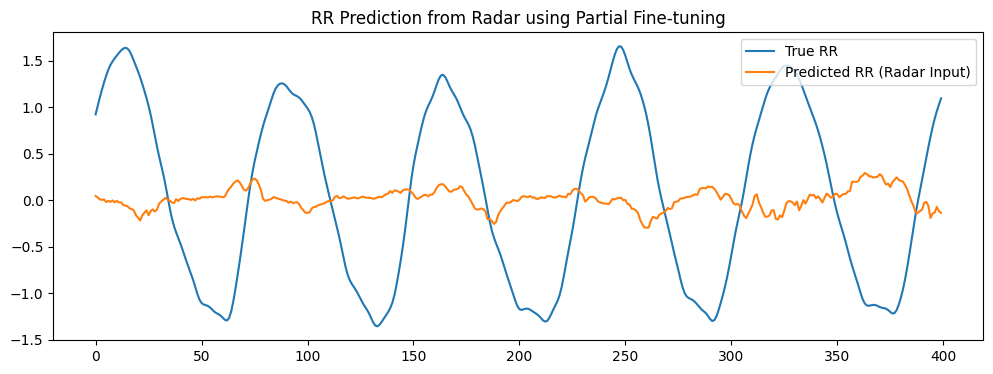

In [ ]:
import matplotlib.pyplot as plt

predicted = best_model.predict(rr_test)

plt.figure(figsize=(12, 4))
plt.plot(rr_target_test[0], label='True RR')
plt.plot(predicted[0], label='Predicted RR (Radar Input)')
plt.legend()
plt.title("RR Prediction from Radar using Partial Fine-tuning")
plt.show()

In [ ]:
# tuner.search(hr_train[:2400], hr_target_train[:2400], epochs=50, validation_data=(hr_train[2400:], hr_target_train[2400:]), callbacks=[
#         EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
#     ])
# best_model = tuner.get_best_models(num_models=50)
# # best_model.summary()

In [ ]:
# best_hps = tuner.get_best_hyperparameters(num_trials=5)[2]
# print(f"Best hyperparameters:")
# print(f" - Filters: {best_hps.get('filters')}")
# print(f" - Kernel Size: {best_hps.get('kernel_size')}")
# print(f" - Dilation Rates: {best_hps.get('dilation1')}, {best_hps.get('dilation2')}, {best_hps.get('dilation3')}, {best_hps.get('dilation4')}, {best_hps.get('dilation5')}")
# print(f" - Activation: {best_hps.get('activation1')}, {best_hps.get('activation2')}, {best_hps.get('activation3')}, {best_hps.get('activation4')}, {best_hps.get('activation5')}")
# print(f" - Learning Rate: {best_hps.get('learning_rate')}")

In [ ]:
# best_hps = tuner.get_best_hyperparameters(num_trials=5)[0]
# best_model_ = tuner.hypermodel.build(best_hps)
# # === Train Best Model ===
# history = best_model_.fit(
#     hr_train, hr_target_train,
#     validation_split=0.2,
#     epochs=200,
#     batch_size=32,
#     verbose=1,
#     # callbacks=[
#     #     EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
#     # ]
# )

In [ ]:
# best_model_.save("hr_model_tuner.h5")

In [ ]:
# from tensorflow.keras.models import load_model

# hr_predict = load_model("hr_model_tuner.h5", custom_objects={'mse': 'mean_squared_error'})

# An1_HR = np.array(best_model(hr_test[0].reshape(1, -1, 1).astype(np.float64))[0,:,0])
# An2_HR = np.array(best_model(hr_test[1].reshape(1, -1, 1).astype(np.float64))[0,:,0])
# An3_HR = np.array(best_model(hr_test[2].reshape(1, -1, 1).astype(np.float64))[0,:,0])
# An4_HR = np.array(best_model(hr_test[3].reshape(1, -1, 1).astype(np.float64))[0,:,0])

In [ ]:
# plt.figure(1)
# plt.title("hr Target")
# plt.plot(hr_target_test[0][:1000],label="hr Target")
# plt.figure(2)
# plt.title("hr Predict")
# plt.plot(An1_HR[:1000],label="hr Predict")
# plt.figure(3)
# plt.title("hr Target")
# plt.plot(hr_target_test[1][:1000],label="hr Target")
# plt.figure(4)
# plt.title("hr Predict")
# plt.plot(An2_HR[:1000],label="hr Predict")
# plt.figure(5)
# plt.title("hr Target")
# plt.plot(hr_target_test[2][:1000],label="hr Target")
# plt.figure(6)
# plt.title("hr Predict")
# plt.plot(An3_HR[:1000],label="hr Predict")
# plt.figure(7)
# plt.title("hr Target")
# plt.plot(hr_target_test[3][:1000],label="hr Target")
# plt.figure(8)
# plt.title("hr Predict")
# plt.plot(An4_HR[:1000],label="hr Predict")

NameError: name 'hr_target_test' is not defined

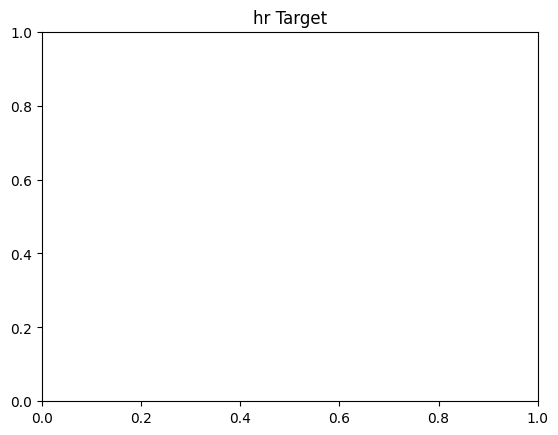

In [ ]:
plt.figure(1)
plt.title("hr Target")
plt.plot(hr_target_test[0][:1000],label="hr Target")
plt.figure(2)
plt.title("hr Predict")
plt.plot(An1_HR[:1000],label="hr Predict")
plt.figure(3)
plt.title("hr Target")
plt.plot(hr_target_test[1][:1000],label="hr Target")
plt.figure(4)
plt.title("hr Predict")
plt.plot(An2_HR[:1000],label="hr Predict")
plt.figure(5)
plt.title("hr Target")
plt.plot(hr_target_test[2][:1000],label="hr Target")
plt.figure(6)
plt.title("hr Predict")
plt.plot(An3_HR[:1000],label="hr Predict")
plt.figure(7)
plt.title("hr Target")
plt.plot(hr_target_test[3][:1000],label="hr Target")
plt.figure(8)
plt.title("hr Predict")
plt.plot(An4_HR[:1000],label="hr Predict")

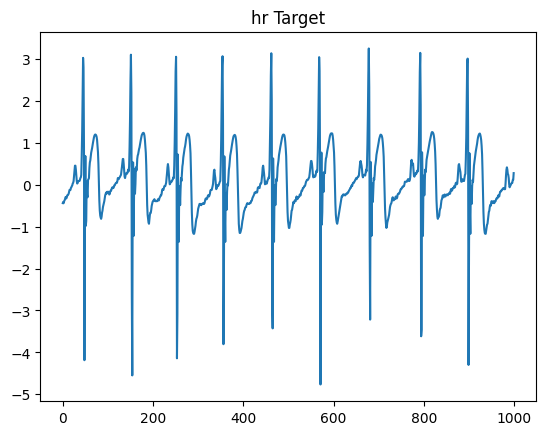

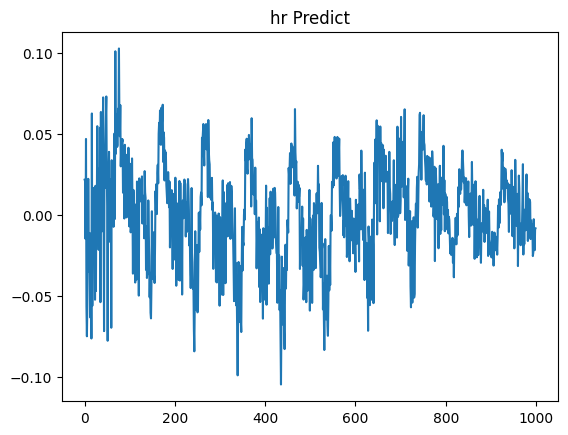

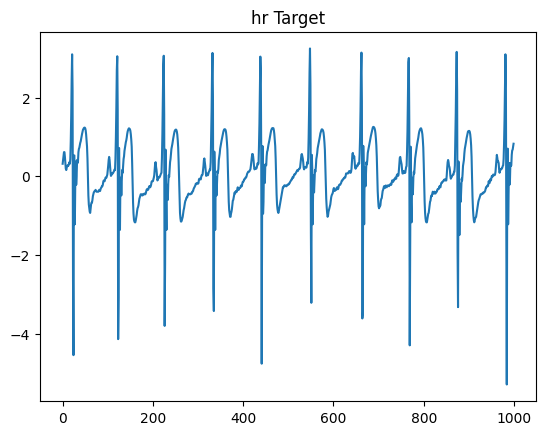

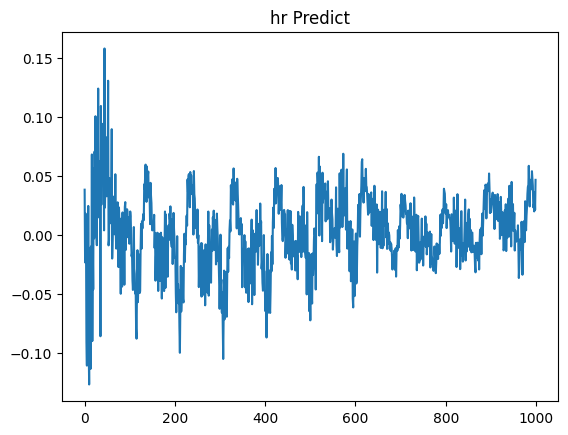

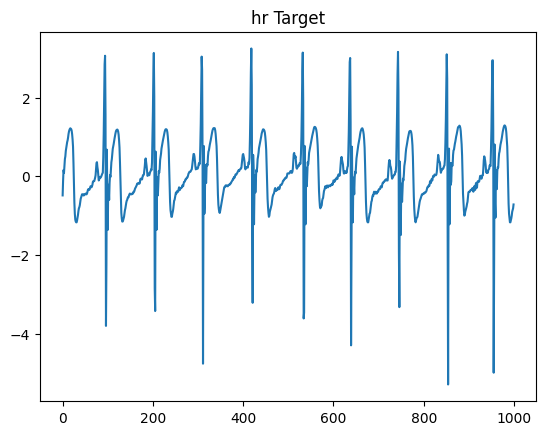

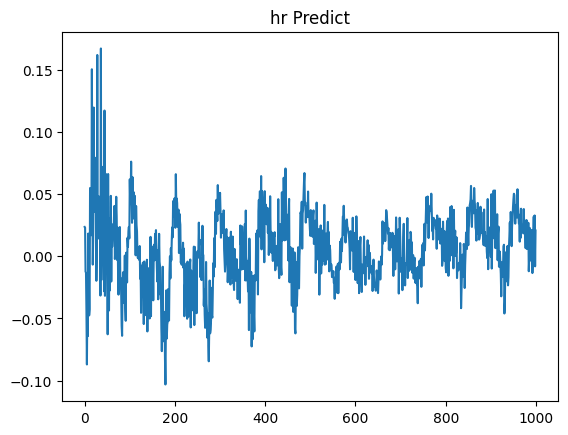

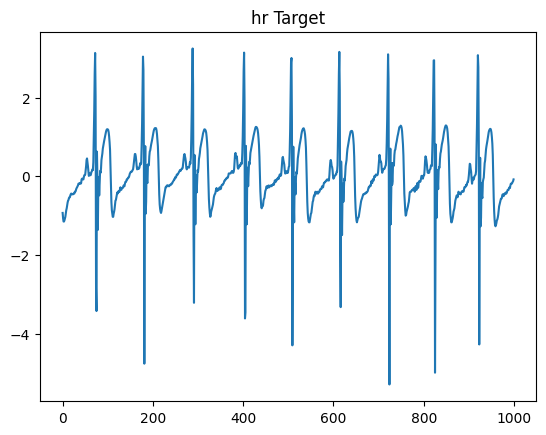

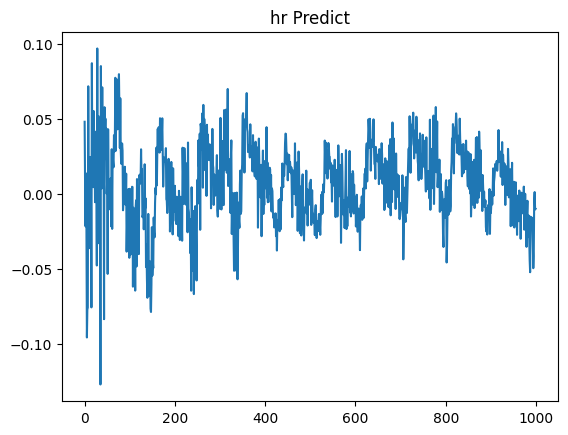

In [ ]:
plt.figure(1)
plt.title("hr Target")
plt.plot(hr_target_test[0][:1000],label="hr Target")
plt.figure(2)
plt.title("hr Predict")
plt.plot(An1_HR[:1000],label="hr Predict")
plt.figure(3)
plt.title("hr Target")
plt.plot(hr_target_test[1][:1000],label="hr Target")
plt.figure(4)
plt.title("hr Predict")
plt.plot(An2_HR[:1000],label="hr Predict")
plt.figure(5)
plt.title("hr Target")
plt.plot(hr_target_test[2][:1000],label="hr Target")
plt.figure(6)
plt.title("hr Predict")
plt.plot(An3_HR[:1000],label="hr Predict")
plt.figure(7)
plt.title("hr Target")
plt.plot(hr_target_test[3][:1000],label="hr Target")
plt.figure(8)
plt.title("hr Predict")
plt.plot(An4_HR[:1000],label="hr Predict")

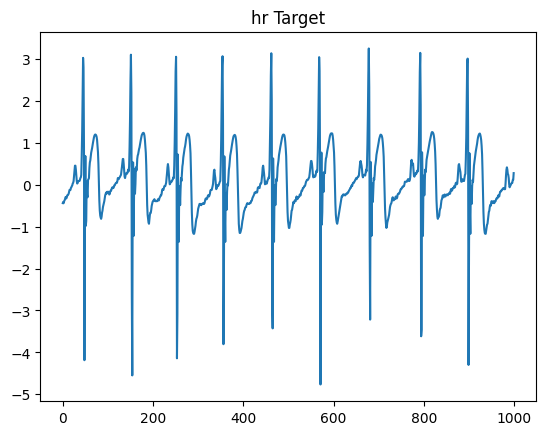

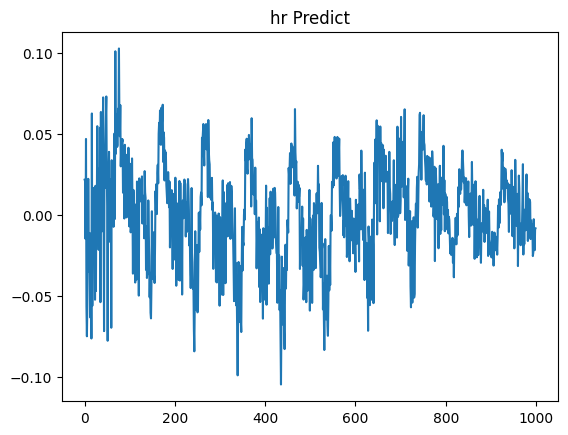

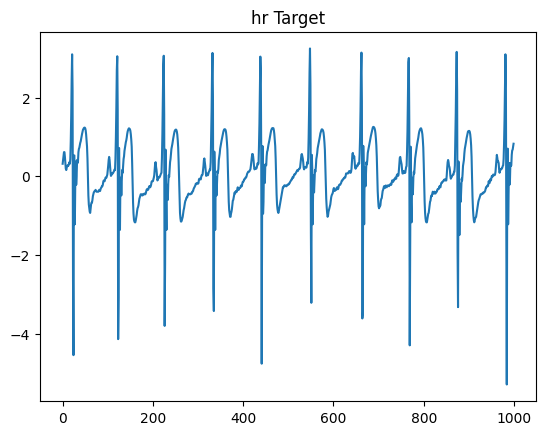

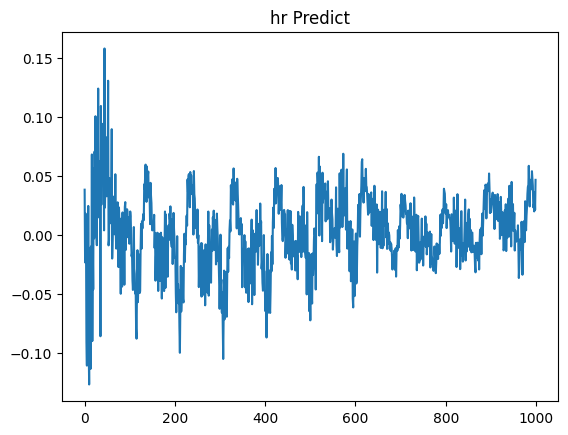

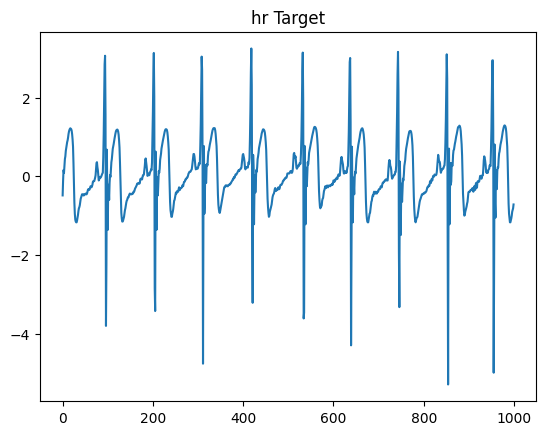

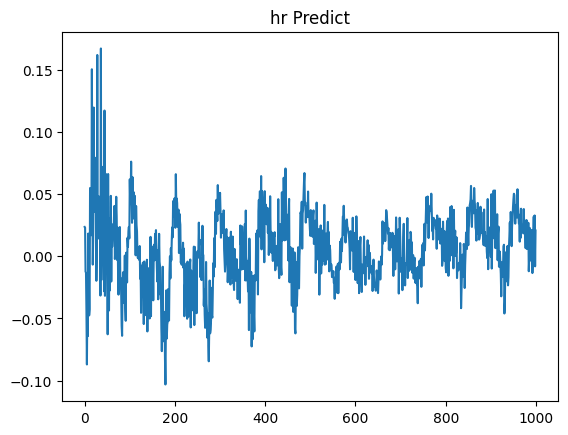

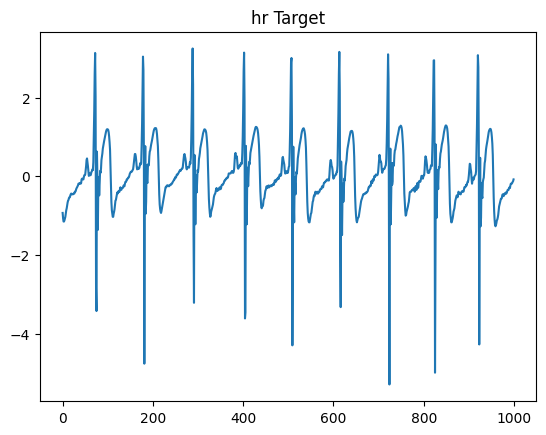

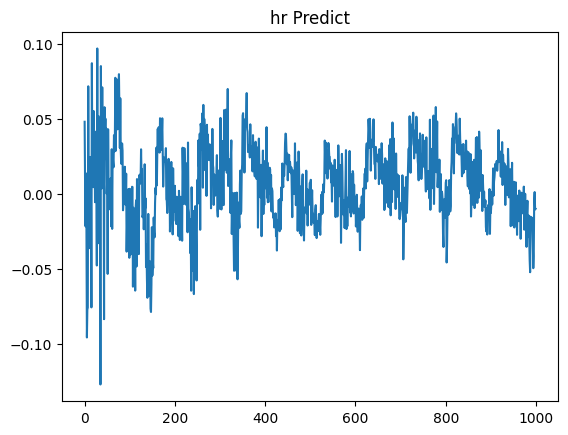

In [ ]:
plt.figure(1)
plt.title("hr Target")
plt.plot(hr_target_test[0][:1000],label="hr Target")
plt.figure(2)
plt.title("hr Predict")
plt.plot(An1_HR[:1000],label="hr Predict")
plt.figure(3)
plt.title("hr Target")
plt.plot(hr_target_test[1][:1000],label="hr Target")
plt.figure(4)
plt.title("hr Predict")
plt.plot(An2_HR[:1000],label="hr Predict")
plt.figure(5)
plt.title("hr Target")
plt.plot(hr_target_test[2][:1000],label="hr Target")
plt.figure(6)
plt.title("hr Predict")
plt.plot(An3_HR[:1000],label="hr Predict")
plt.figure(7)
plt.title("hr Target")
plt.plot(hr_target_test[3][:1000],label="hr Target")
plt.figure(8)
plt.title("hr Predict")
plt.plot(An4_HR[:1000],label="hr Predict")